In [10]:
# Load required packages
library(dplyr)
library(tidyr)
library(data.table)
library(ggplot2)
library(car)

In [61]:
# Read data frame
df <- df_subset <- fread("../data/data_tidy.tsv", sep = "\t")
df_subset <- fread("../data/data_subset.tsv", sep = "\t")
genes_of_interest <- as.list(unique(df_subset$GeneName))
head(df,5)
head(df_subset, 5)
genes_of_interest

GeneID,GeneName,Weeks,Region,Expression
<chr>,<chr>,<chr>,<chr>,<dbl>
ENSG00000000003,TSPAN6,10 post conception weeks,basal ganglion,4.754888
ENSG00000000003,TSPAN6,10 post conception weeks,brain fragment,5.169925
ENSG00000000003,TSPAN6,10 post conception weeks,cerebellum,5.672425
ENSG00000000003,TSPAN6,10 post conception weeks,cerebral cortex,5.882643
ENSG00000000003,TSPAN6,10 post conception weeks,choroid plexus,5.169925


GeneID,GeneName,Weeks,Region,Expression,Type,Numeric,NumericWeeks
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<chr>
ENSG00000004848,ARX,10 post conception weeks,basal ganglion,6.0660892,p,10,p10
ENSG00000004848,ARX,10 post conception weeks,brain fragment,0.6780719,p,10,p10
ENSG00000004848,ARX,10 post conception weeks,cerebellum,2.0000000,p,10,p10
ENSG00000004848,ARX,10 post conception weeks,cerebral cortex,6.4757334,p,10,p10
ENSG00000004848,ARX,10 post conception weeks,choroid plexus,2.0000000,p,10,p10


[[1]]
[1] "ARX"

[[2]]
[1] "DVL2"

[[3]]
[1] "CACNA1G"

[[4]]
[1] "NOS2"

[[5]]
[1] "PAX6"

[[6]]
[1] "CACNA2D2"

[[7]]
[1] "SYN1"

[[8]]
[1] "CDKL5"

# How does the data distribution look?

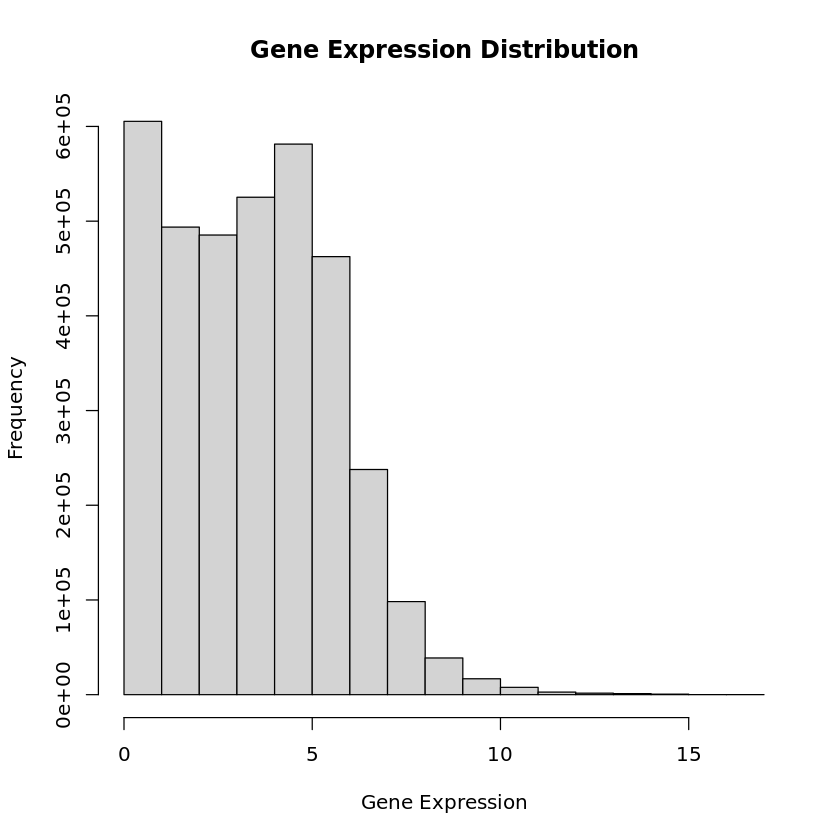

In [40]:
hist(df$Expression, main = "Gene Expression Distribution", xlab = "Gene Expression")

This looks like the data might be positively skewed. If true, it can potentially be beneficial for the statistical modeling to make the data distribution closer to normal via some transformation (log transform, square root, reciprocal, box-cox, etc.). Why? Because, for example for Bayesian modeling, the decision may also depend on the prior knowledge we have about the data and the specific model we are planning to use. Some Bayesian models might be more robust to violations of normality, while others might require more normally-distributed data to produce accurate results.

Let's try the popular square root transformation here that is beneficial for right skewed datasets:

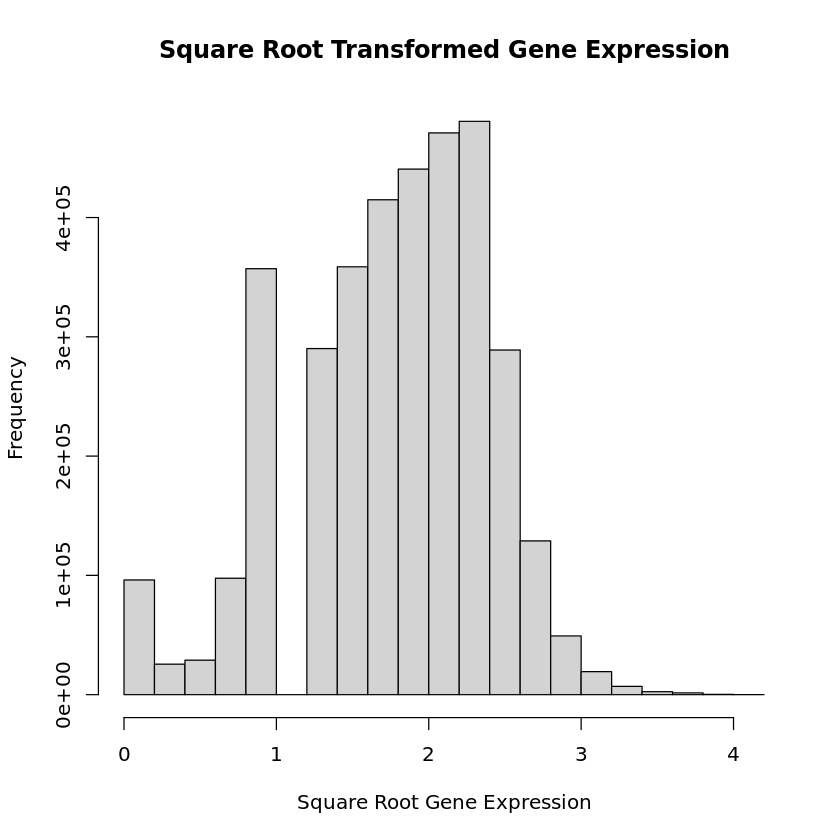

In [41]:
df$Expression_sqrt <- sqrt(df$Expression)
hist(df$Expression_sqrt, main = "Square Root Transformed Gene Expression", xlab = "Square Root Gene Expression")

However, we need more definitve answer on whether the data (1) is indeed skewed, and (2) requires the square-root transformation.

# Is normal distribution hypothesis valid?

Let's start by a standard box-plot analysis.

## 1- Box-plot anlaysis

In [6]:
length(unique(df$GeneName)) 

[1] 21436

Too many unique genes exist in the data for using a box plot to get a glance at that data stats. One way around it is to focus on the top 10 genes that have the highest epxression variance in the dataset:

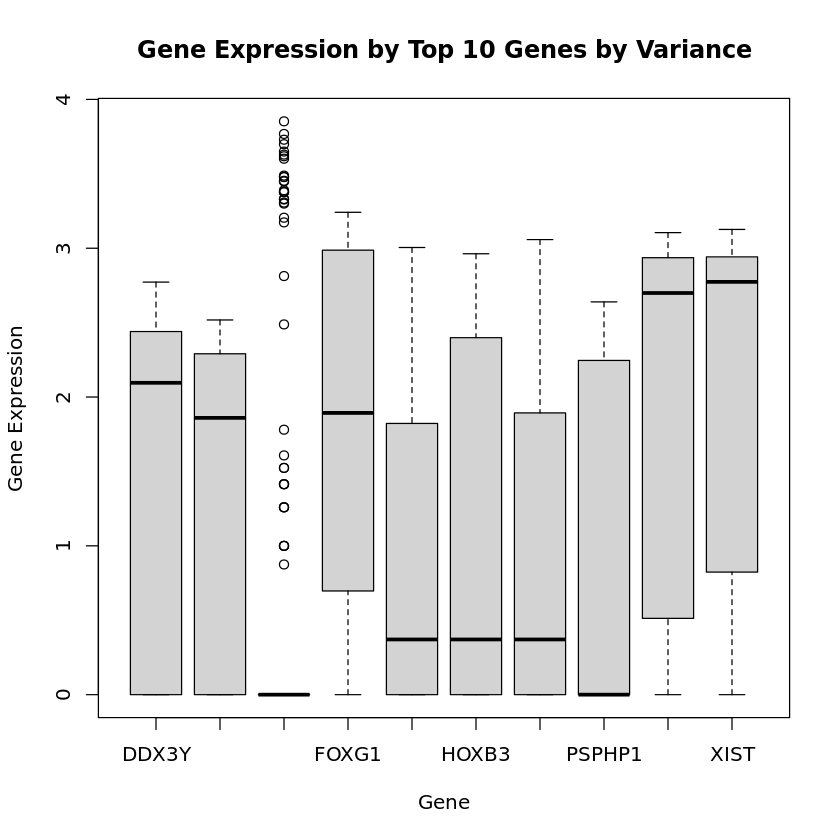

In [16]:
# Find the variance in gene expression for each gene
gene_variances <- tapply(df$Expression_sqrt, df$GeneName, var)

# Select the top 10 genes with the highest variance
top_genes <- names(sort(gene_variances, decreasing = TRUE))[1:10]

# Subset the data to include only these top genes
df_top <- df[df$GeneName %in% top_genes,]

# Create the boxplot
boxplot(Expression_sqrt ~ GeneName, data = df_top, main = "Gene Expression by Top 10 Genes by Variance", xlab = "Gene", ylab = "Gene Expression")

Alternatively, we can focus on a subset of genes that are known to contribute to the neurodevelopment of a fetus 9the genes of interest). Let's do it first for the original (skewed) data:

Saving 6.67 x 6.67 in image


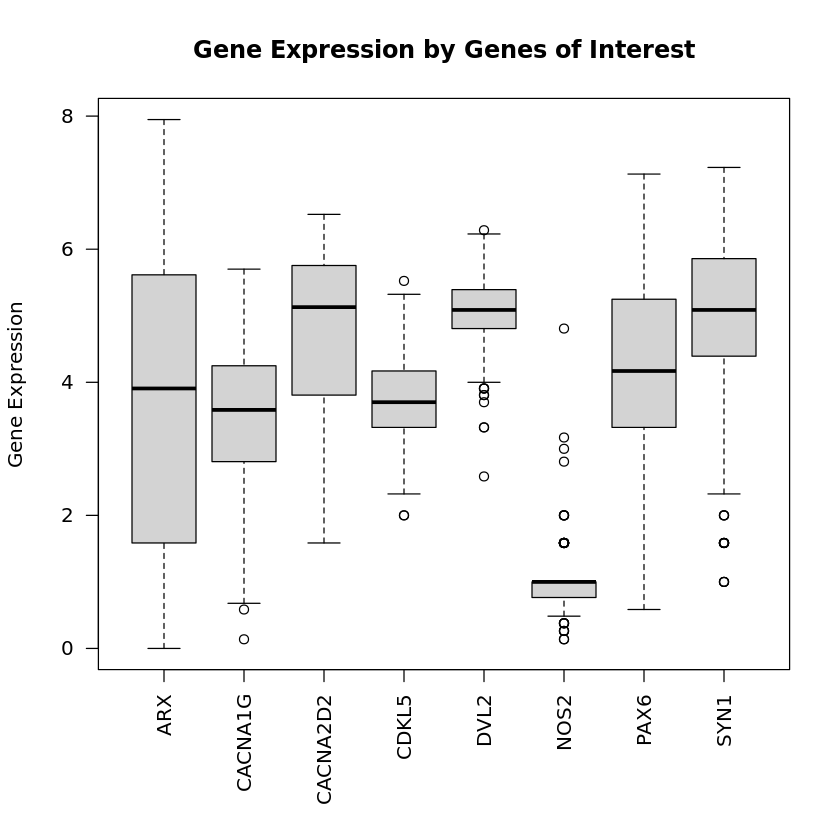

In [17]:
# Set the margin at the bottom to accommodate rotated labels
par(mar = c(7, 4, 4, 2) + 0.1)

# Create the boxplot with rotated x-axis labels
boxplot(Expression ~ GeneName, data = df_subset, main = "Gene Expression by Genes of Interest",
        xlab = "", ylab = "Gene Expression", las = 2)

# Convert the base R boxplot to a ggplot object
plot <- ggplot() + annotation_custom(grob = grid::frameGrob(), xmin = -Inf, xmax = Inf, ymin = -Inf, ymax = Inf)

# Save the plot to a file
ggsave("../figures/boxplot_expression_genes_of_interest.png", plot, device = "png")

# Reset the par settings for further plots
par(mar = c(5, 4, 4, 2) + 0.1)


In [18]:
# For each gene, summarize the expression values
by(df_subset$Expression, df_subset$GeneName, summary)
# For each gene, identify the outliers
by(df_subset$Expression, df_subset$GeneName, function(x) boxplot.stats(x)$out)

df_subset$GeneName: ARX
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.585   3.907   3.656   5.615   7.948 
------------------------------------------------------------ 
df_subset$GeneName: CACNA1G
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1375  2.8074  3.5850  3.3575  4.2479  5.7004 
------------------------------------------------------------ 
df_subset$GeneName: CACNA2D2
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.585   3.807   5.129   4.759   5.755   6.524 
------------------------------------------------------------ 
df_subset$GeneName: CDKL5
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   3.322   3.700   3.750   4.170   5.524 
------------------------------------------------------------ 
df_subset$GeneName: DVL2
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.585   4.807   5.087   5.045   5.392   6.285 
------------------------------------------------------------ 
df_subset$GeneName: NOS2
   Min. 1st Qu.  Median    Mean 3rd Qu.    

df_subset$GeneName: ARX
numeric(0)
------------------------------------------------------------ 
df_subset$GeneName: CACNA1G
[1] 0.5849625 0.1375035
------------------------------------------------------------ 
df_subset$GeneName: CACNA2D2
numeric(0)
------------------------------------------------------------ 
df_subset$GeneName: CDKL5
[1] 5.523562 2.000000 2.000000
------------------------------------------------------------ 
df_subset$GeneName: DVL2
 [1] 3.807355 3.807355 3.906891 3.906891 3.700440 2.584963 3.321928 3.321928
 [9] 6.285402 3.906891
------------------------------------------------------------ 
df_subset$GeneName: NOS2
 [1] 1.5849625 2.8073549 1.5849625 1.5849625 0.3785116 1.5849625 1.5849625
 [8] 0.2630344 0.2630344 0.2630344 1.5849625 0.1375035 0.1375035 0.3785116
[15] 0.3785116 3.1699250 2.0000000 4.8073549 3.0000000 1.5849625 1.5849625
[22] 1.5849625 2.0000000 2.0000000 1.5849625 1.5849625 2.0000000 1.5849625
[29] 1.5849625 1.5849625 0.3785116 1.5849625 1.5849625
-

Now, Let's try with transformed (normal) data:

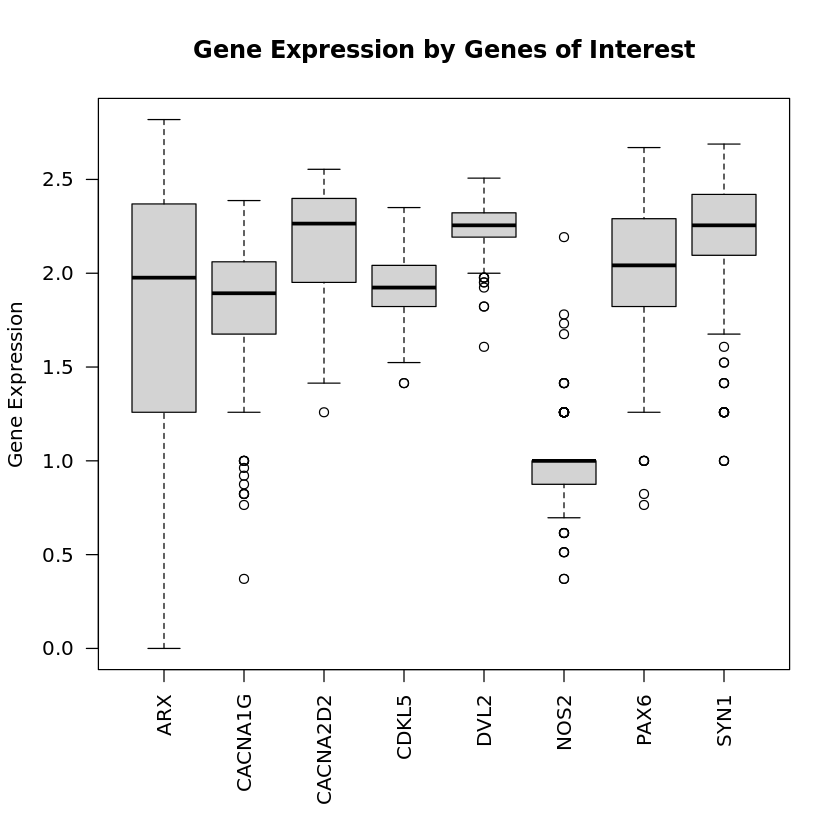

In [42]:
# Add transformation to df_subset
df_subset$Expression_sqrt <- sqrt(df_subset$Expression)

# Set the margin at the bottom to accommodate rotated labels
par(mar = c(7, 4, 4, 2) + 0.1)

# Create the boxplot with rotated x-axis labels
boxplot(Expression_sqrt ~ GeneName, data = df_subset, main = "Gene Expression by Genes of Interest",
        xlab = "", ylab = "Gene Expression", las = 2)

# Convert the base R boxplot to a ggplot object
plot <- ggplot() + annotation_custom(grob = grid::frameGrob(), xmin = -Inf, xmax = Inf, ymin = -Inf, ymax = Inf)

# Save the plot to a file
# ggsave("../figures/boxplot_expression_genes_of_interest.png", plot, device = "png")

# Reset the par settings for further plots
par(mar = c(5, 4, 4, 2) + 0.1)

In [20]:
# For each gene, summarize the expression values
by(df_subset$Expression_sqrt, df_subset$GeneName, summary)
# For each gene, identify the outliers
by(df_subset$Expression_sqrt, df_subset$GeneName, function(x) boxplot.stats(x)$out)

df_subset$GeneName: ARX
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.259   1.977   1.768   2.370   2.819 
------------------------------------------------------------ 
df_subset$GeneName: CACNA1G
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3708  1.6755  1.8934  1.7949  2.0611  2.3876 
------------------------------------------------------------ 
df_subset$GeneName: CACNA2D2
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.259   1.951   2.265   2.161   2.399   2.554 
------------------------------------------------------------ 
df_subset$GeneName: CDKL5
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.414   1.823   1.924   1.929   2.042   2.350 
------------------------------------------------------------ 
df_subset$GeneName: DVL2
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.608   2.193   2.256   2.242   2.322   2.507 
------------------------------------------------------------ 
df_subset$GeneName: NOS2
   Min. 1st Qu.  Median    Mean 3rd Qu.    

df_subset$GeneName: ARX
numeric(0)
------------------------------------------------------------ 
df_subset$GeneName: CACNA1G
 [1] 0.7648284 1.0000000 1.0000000 0.9622886 1.0000000 1.0000000 0.8234512
 [8] 0.8749484 0.8234512 0.8234512 0.3708147 0.9208675
------------------------------------------------------------ 
df_subset$GeneName: CACNA2D2
[1] 1.258953
------------------------------------------------------------ 
df_subset$GeneName: CDKL5
[1] 1.414214 1.414214
------------------------------------------------------------ 
df_subset$GeneName: DVL2
[1] 1.951244 1.951244 1.976586 1.976586 1.923653 1.607782 1.822616 1.822616
[9] 1.976586
------------------------------------------------------------ 
df_subset$GeneName: NOS2
 [1] 1.2589529 1.6755163 1.2589529 1.2589529 0.6152330 1.2589529 1.2589529
 [8] 0.5128688 0.5128688 0.5128688 1.2589529 0.3708147 0.3708147 0.6152330
[15] 0.6152330 1.7804283 1.4142136 2.1925681 1.7320508 1.2589529 1.2589529
[22] 1.2589529 1.4142136 1.4142136 1.258952

Looking at the summary statistics and outlier information above, it doesn't seem like there's a clear cut answer as to whether it is beneficial to use the transformed data. Both datasets show somewhat similar patterns in terms of summary statistics and outliers. It is worthwhile further analysis using Q-Q plots to better visualize the distribution of the data.

## 2- QQ plot analysis

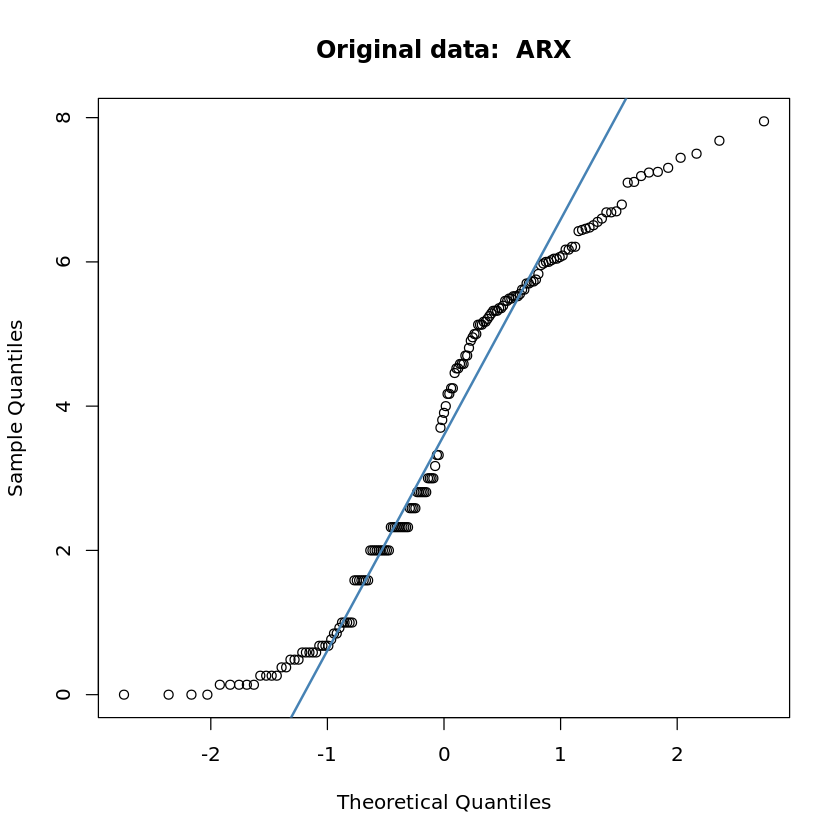

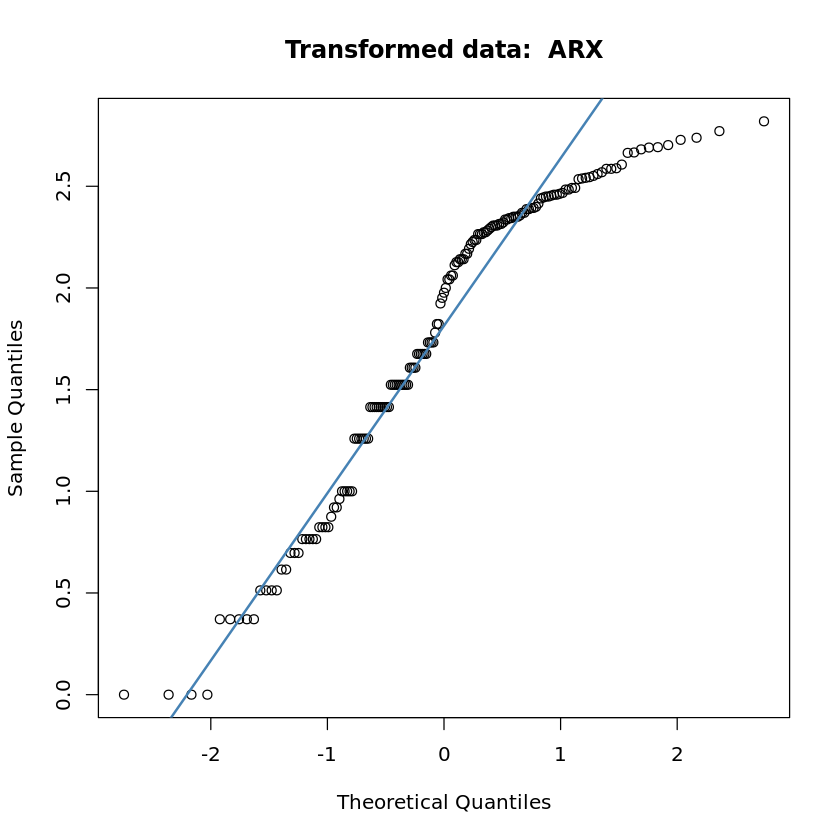

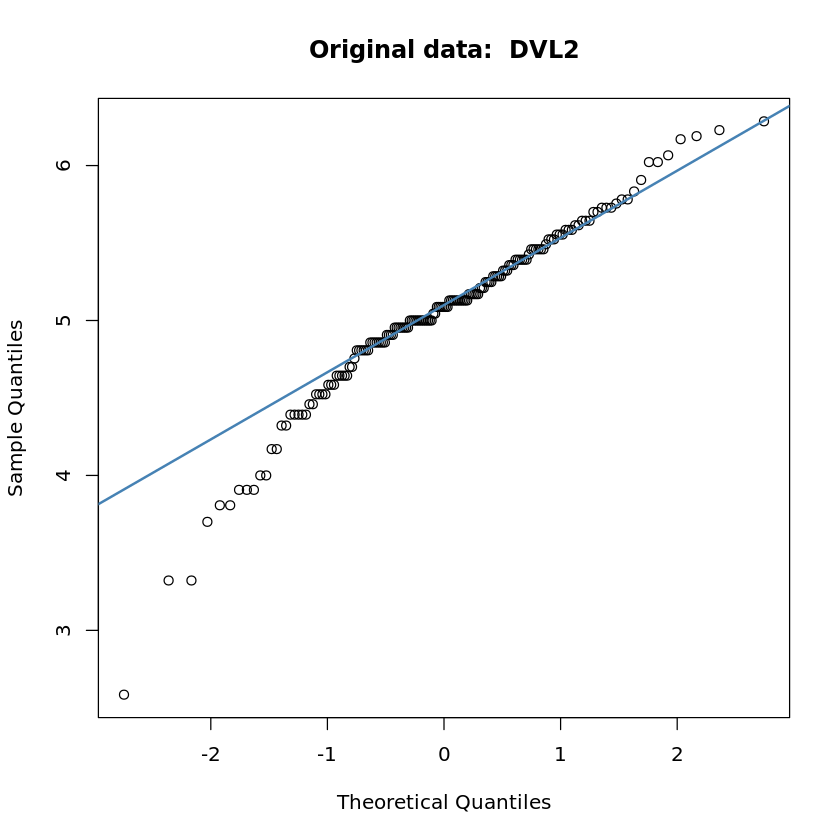

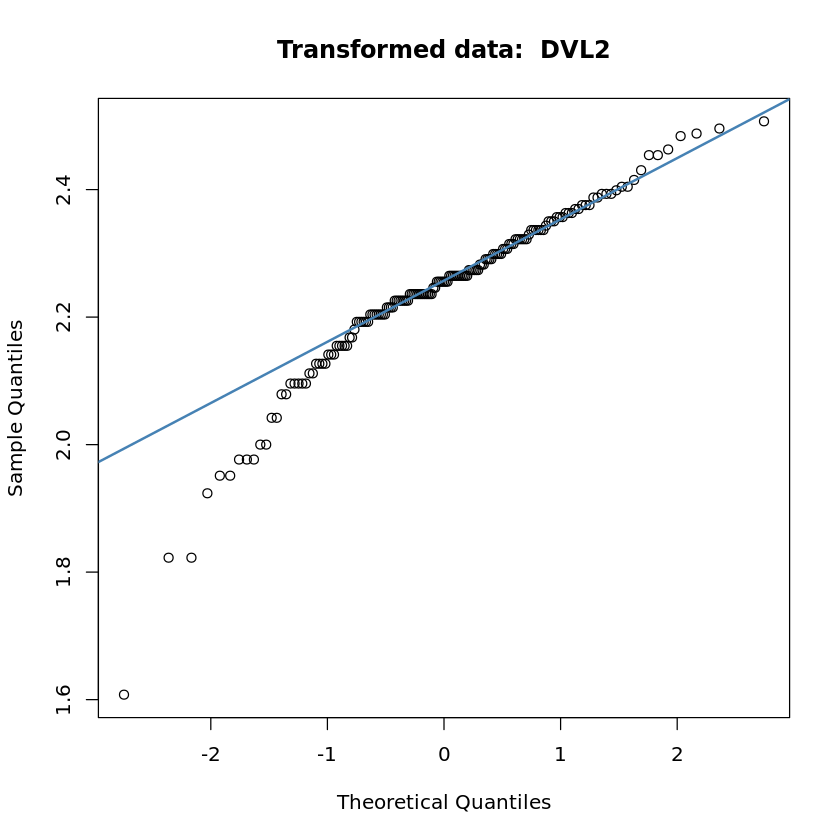

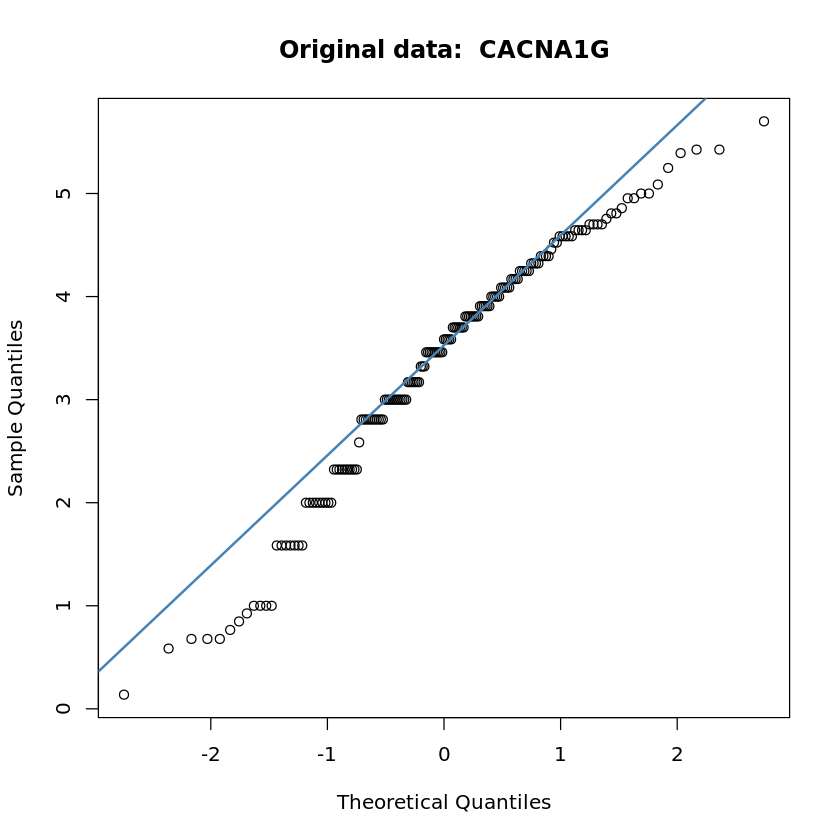

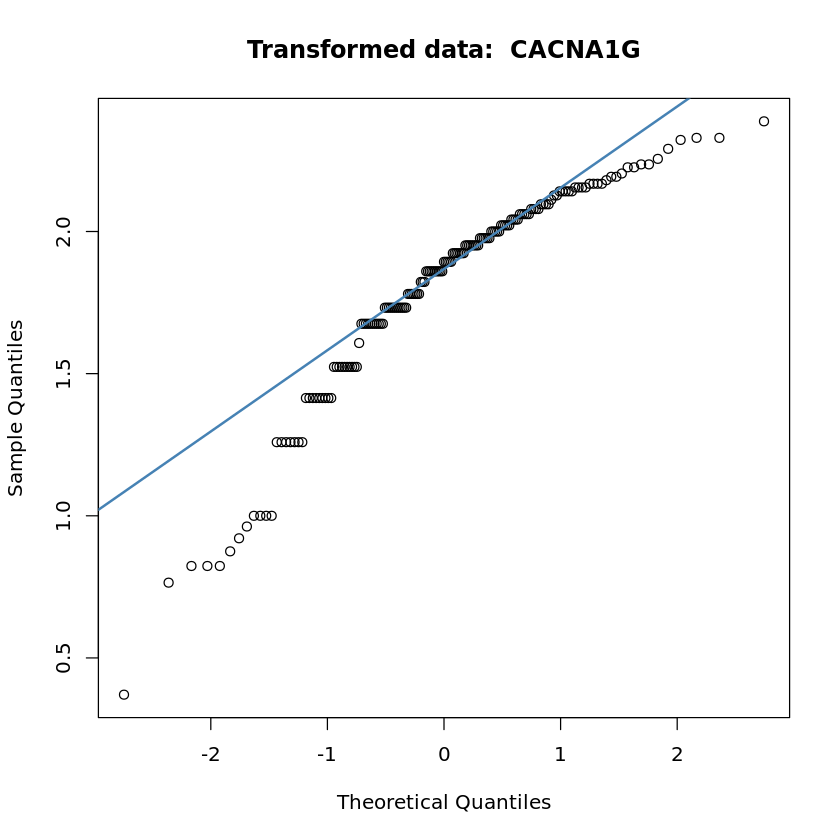

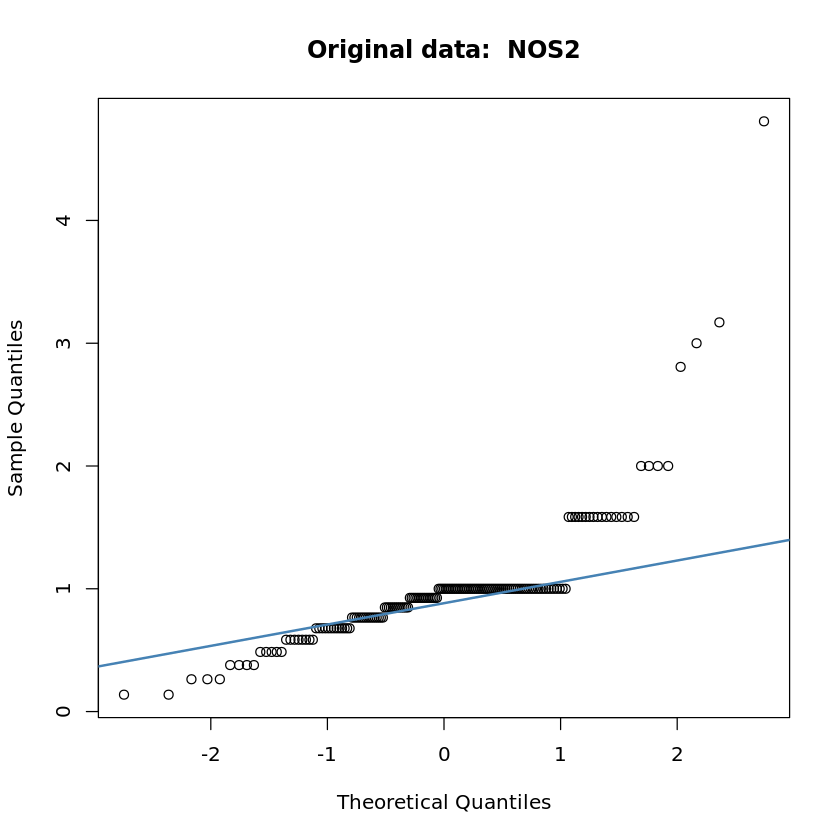

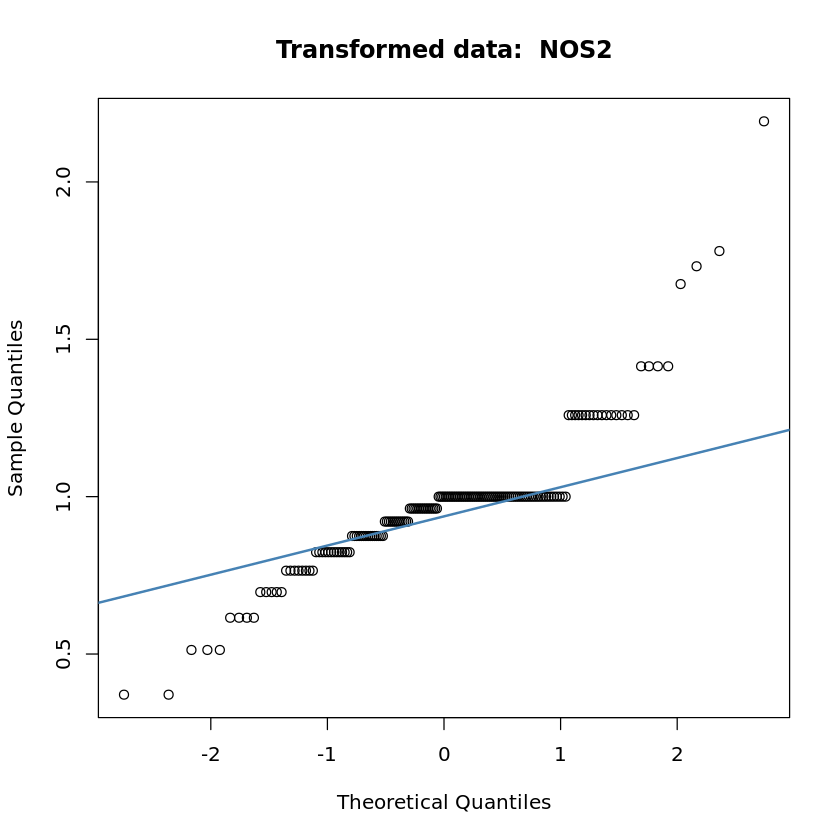

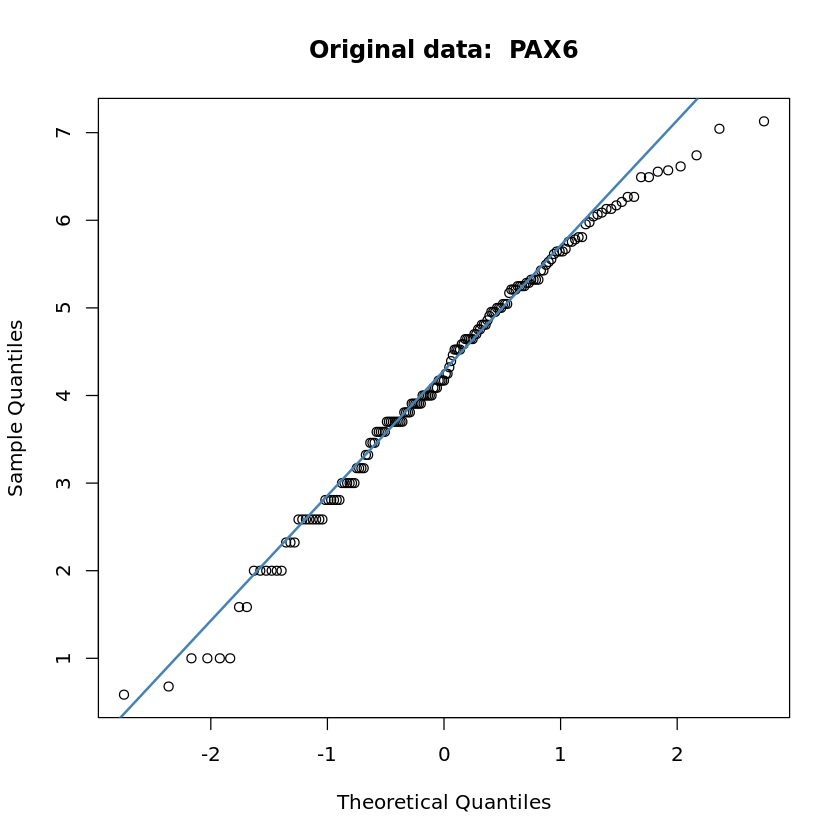

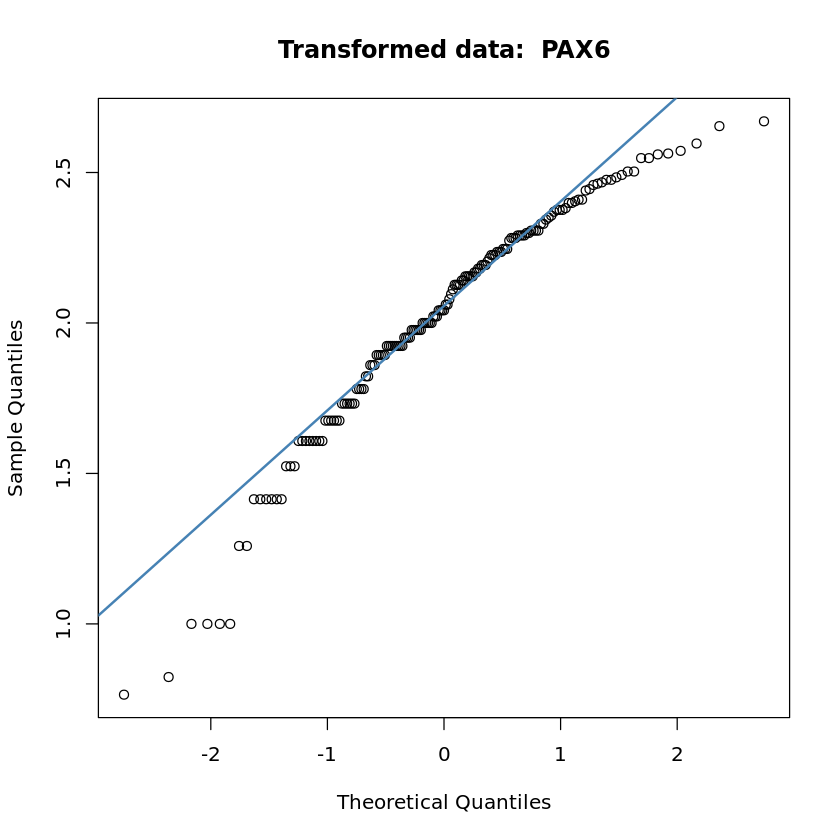

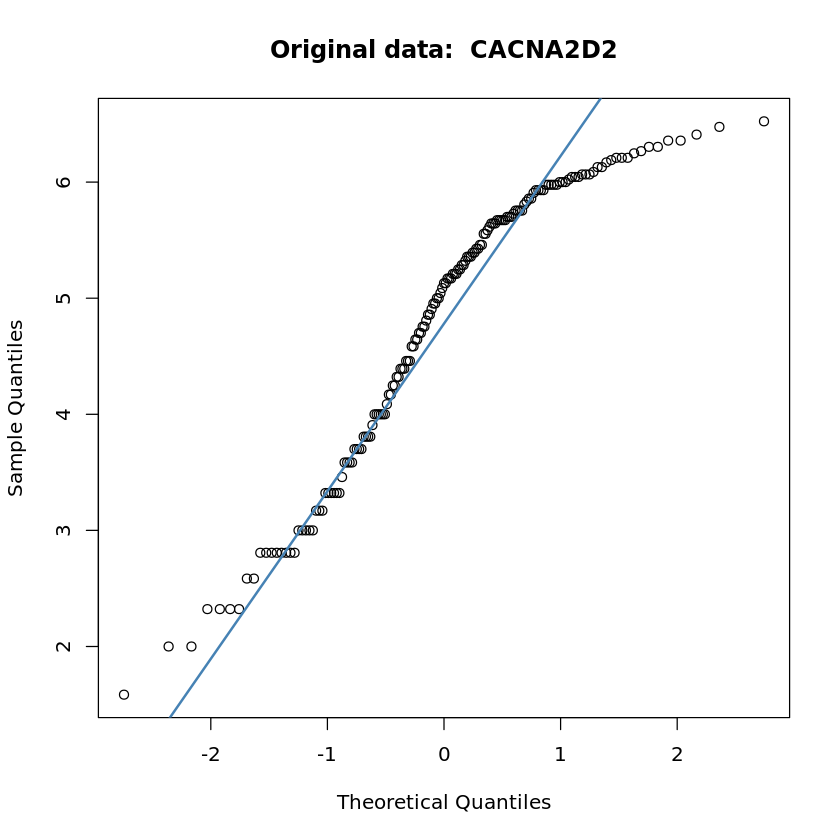

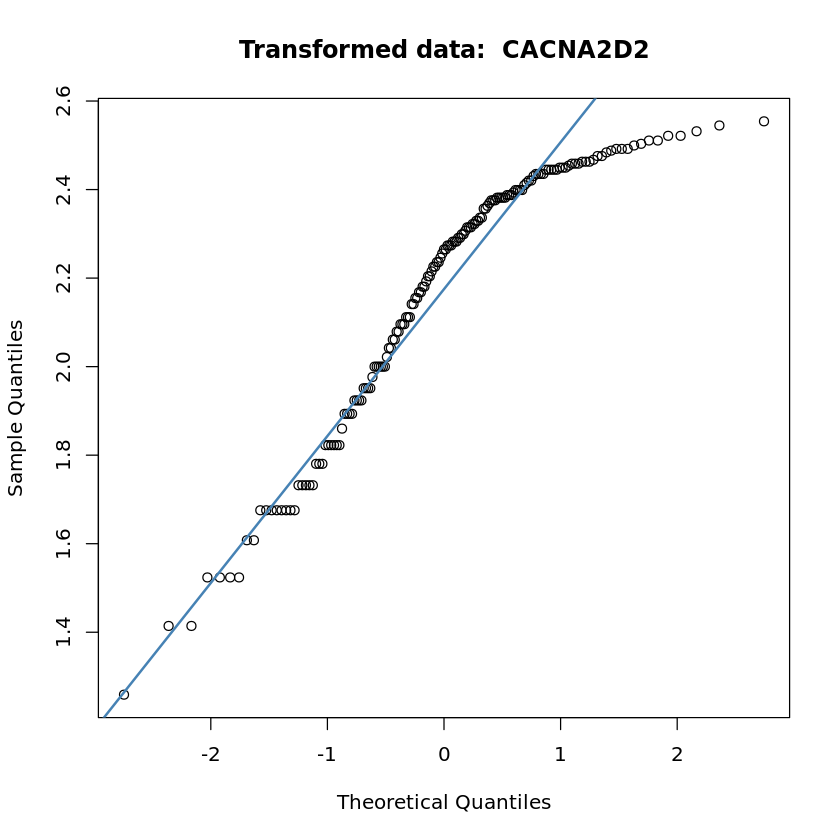

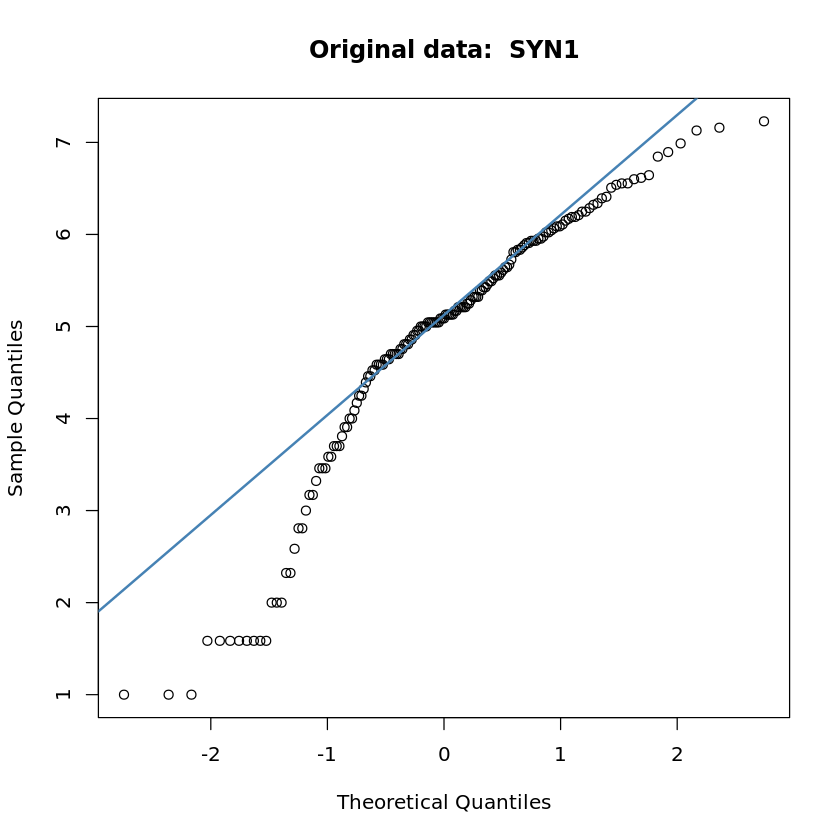

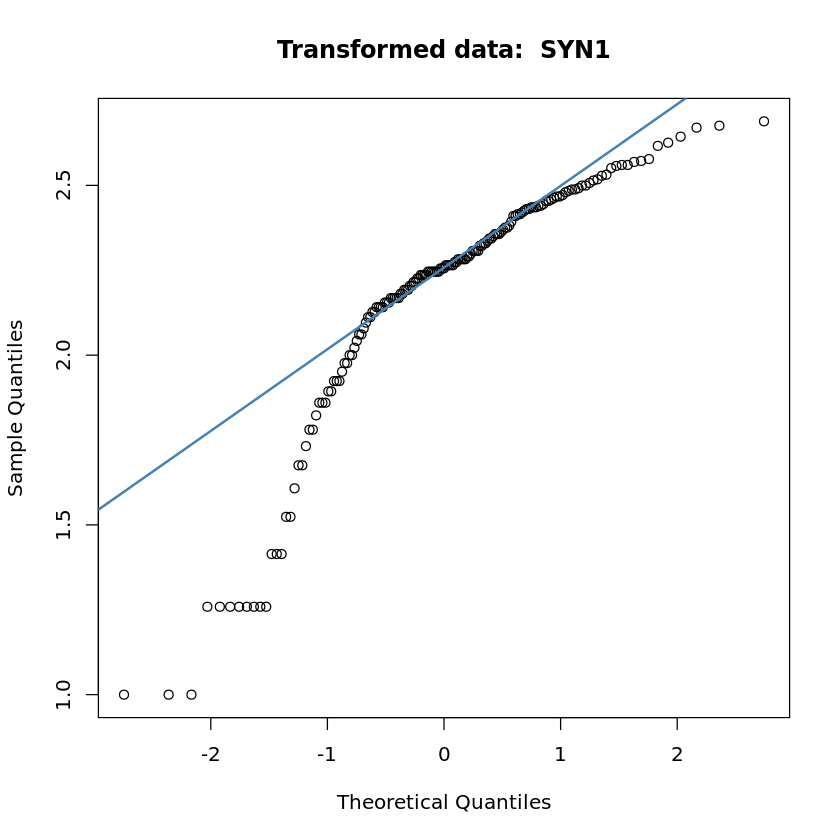

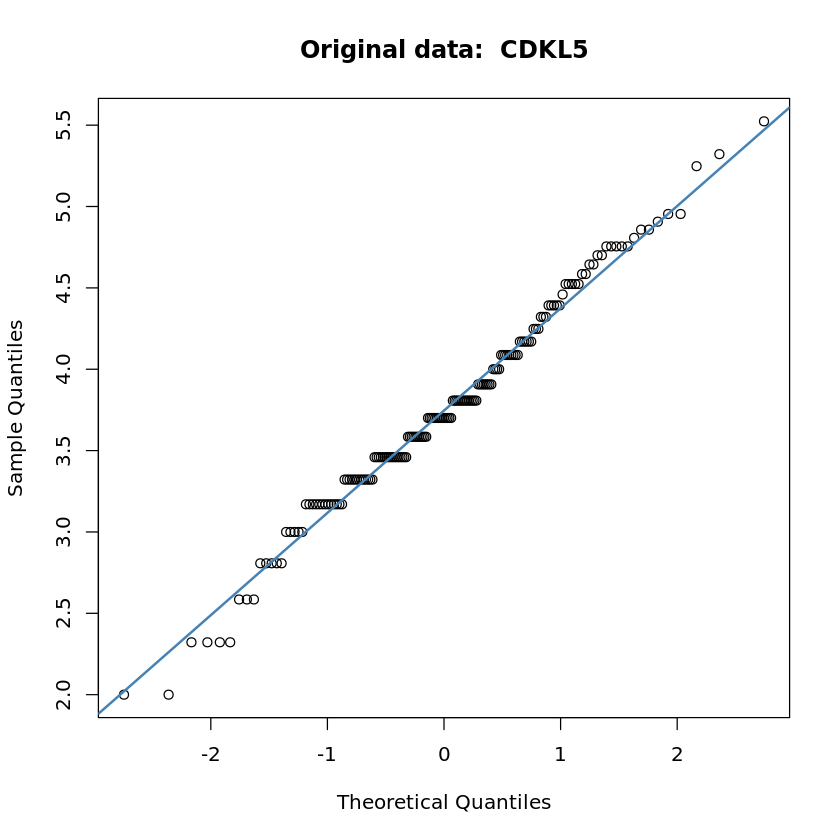

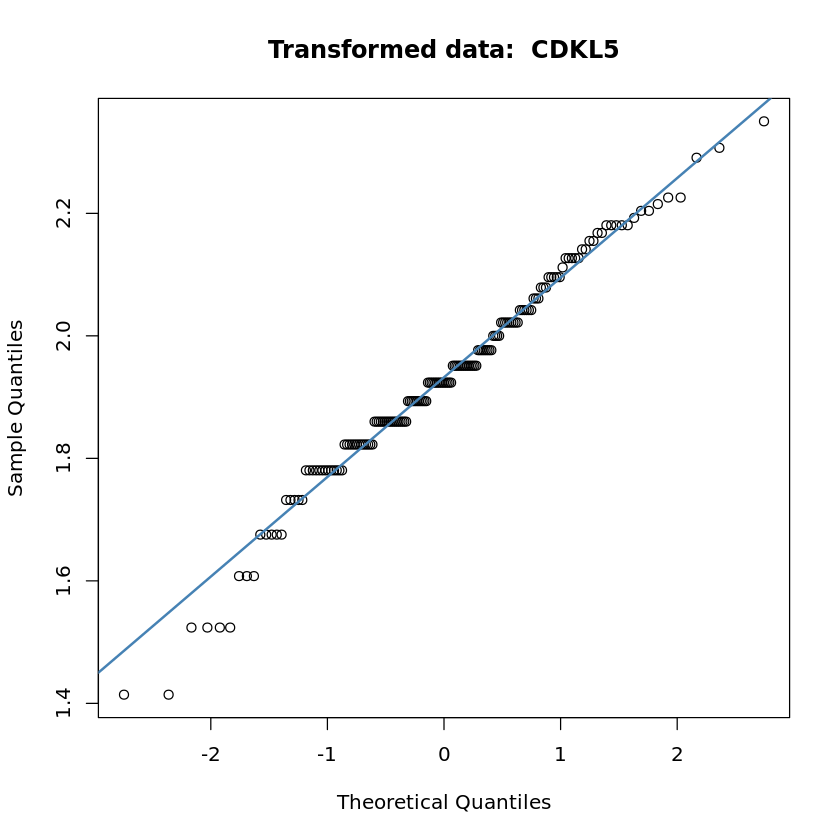

In [43]:
for (gene in genes_of_interest){
    # Filter dataframe for current gene
    df_gene <- df[df$GeneName == gene,]
    
    # Create QQ plots for original and transformed data
    # Original data
    qqnorm(df_gene$Expression, main = paste("Original data: ", gene))
    qqline(df_gene$Expression, col = "steelblue", lwd = 2)
    
    # Transformed data
    qqnorm(df_gene$Expression_sqrt, main = paste("Transformed data: ", gene))
    qqline(df_gene$Expression_sqrt, col = "steelblue", lwd = 2)
}

The QQ plots show that the original data more or less follows normal distribution (points are close to the reference line), and for those that the original data seems heavy-tailed or skewed (or both), the transformation does not change the behavior. So far it seems the original data is close enough to normal distribution and does not need any transformation. For a more definitive answer and as a final test, let's do KS test:

## 3- KS Test

In [44]:
for (gene in genes_of_interest){
    # Filter dataframe for current gene
    df_gene <- df[df$GeneName == gene,]
    
    # Perform KS tests 
    ks_orig <- ks.test(df_gene$Expression, "pnorm", mean(df_gene$Expression), sd(df_gene$Expression))
    ks_sqrt <- ks.test(df_gene$Expression_sqrt, "pnorm", mean(df_gene$Expression_sqrt), sd(df_gene$Expression_sqrt))
    
    # Print results
    cat("\nKS test for original data: ", gene, "\n")
    print(ks_orig)
    cat("\nKS test for sqrt data: ", gene, "\n")
    print(ks_sqrt)
}

Warning message in ks.test(df_gene$Expression, "pnorm", mean(df_gene$Expression), :
“ties should not be present for the Kolmogorov-Smirnov test”
Warning message in ks.test(df_gene$Expression_sqrt, "pnorm", mean(df_gene$Expression_sqrt), :
“ties should not be present for the Kolmogorov-Smirnov test”



KS test for original data:  ARX 

	One-sample Kolmogorov-Smirnov test

data:  df_gene$Expression
D = 0.12659, p-value = 0.0101
alternative hypothesis: two-sided


KS test for sqrt data:  ARX 

	One-sample Kolmogorov-Smirnov test

data:  df_gene$Expression_sqrt
D = 0.14909, p-value = 0.001304
alternative hypothesis: two-sided



Warning message in ks.test(df_gene$Expression, "pnorm", mean(df_gene$Expression), :
“ties should not be present for the Kolmogorov-Smirnov test”
Warning message in ks.test(df_gene$Expression_sqrt, "pnorm", mean(df_gene$Expression_sqrt), :
“ties should not be present for the Kolmogorov-Smirnov test”



KS test for original data:  DVL2 

	One-sample Kolmogorov-Smirnov test

data:  df_gene$Expression
D = 0.11405, p-value = 0.02733
alternative hypothesis: two-sided


KS test for sqrt data:  DVL2 

	One-sample Kolmogorov-Smirnov test

data:  df_gene$Expression_sqrt
D = 0.1285, p-value = 0.008597
alternative hypothesis: two-sided



Warning message in ks.test(df_gene$Expression, "pnorm", mean(df_gene$Expression), :
“ties should not be present for the Kolmogorov-Smirnov test”
Warning message in ks.test(df_gene$Expression_sqrt, "pnorm", mean(df_gene$Expression_sqrt), :
“ties should not be present for the Kolmogorov-Smirnov test”



KS test for original data:  CACNA1G 

	One-sample Kolmogorov-Smirnov test

data:  df_gene$Expression
D = 0.098021, p-value = 0.08395
alternative hypothesis: two-sided


KS test for sqrt data:  CACNA1G 

	One-sample Kolmogorov-Smirnov test

data:  df_gene$Expression_sqrt
D = 0.13714, p-value = 0.004034
alternative hypothesis: two-sided



Warning message in ks.test(df_gene$Expression, "pnorm", mean(df_gene$Expression), :
“ties should not be present for the Kolmogorov-Smirnov test”
Warning message in ks.test(df_gene$Expression_sqrt, "pnorm", mean(df_gene$Expression_sqrt), :
“ties should not be present for the Kolmogorov-Smirnov test”



KS test for original data:  NOS2 

	One-sample Kolmogorov-Smirnov test

data:  df_gene$Expression
D = 0.35439, p-value < 2.2e-16
alternative hypothesis: two-sided


KS test for sqrt data:  NOS2 

	One-sample Kolmogorov-Smirnov test

data:  df_gene$Expression_sqrt
D = 0.30897, p-value = 4.163e-14
alternative hypothesis: two-sided



Warning message in ks.test(df_gene$Expression, "pnorm", mean(df_gene$Expression), :
“ties should not be present for the Kolmogorov-Smirnov test”
Warning message in ks.test(df_gene$Expression_sqrt, "pnorm", mean(df_gene$Expression_sqrt), :
“ties should not be present for the Kolmogorov-Smirnov test”



KS test for original data:  PAX6 

	One-sample Kolmogorov-Smirnov test

data:  df_gene$Expression
D = 0.054767, p-value = 0.7054
alternative hypothesis: two-sided


KS test for sqrt data:  PAX6 

	One-sample Kolmogorov-Smirnov test

data:  df_gene$Expression_sqrt
D = 0.091932, p-value = 0.1229
alternative hypothesis: two-sided



Warning message in ks.test(df_gene$Expression, "pnorm", mean(df_gene$Expression), :
“ties should not be present for the Kolmogorov-Smirnov test”
Warning message in ks.test(df_gene$Expression_sqrt, "pnorm", mean(df_gene$Expression_sqrt), :
“ties should not be present for the Kolmogorov-Smirnov test”



KS test for original data:  CACNA2D2 

	One-sample Kolmogorov-Smirnov test

data:  df_gene$Expression
D = 0.1225, p-value = 0.01414
alternative hypothesis: two-sided


KS test for sqrt data:  CACNA2D2 

	One-sample Kolmogorov-Smirnov test

data:  df_gene$Expression_sqrt
D = 0.13891, p-value = 0.003433
alternative hypothesis: two-sided



Warning message in ks.test(df_gene$Expression, "pnorm", mean(df_gene$Expression), :
“ties should not be present for the Kolmogorov-Smirnov test”
Warning message in ks.test(df_gene$Expression_sqrt, "pnorm", mean(df_gene$Expression_sqrt), :
“ties should not be present for the Kolmogorov-Smirnov test”



KS test for original data:  SYN1 

	One-sample Kolmogorov-Smirnov test

data:  df_gene$Expression
D = 0.14637, p-value = 0.001701
alternative hypothesis: two-sided


KS test for sqrt data:  SYN1 

	One-sample Kolmogorov-Smirnov test

data:  df_gene$Expression_sqrt
D = 0.18776, p-value = 1.772e-05
alternative hypothesis: two-sided



Warning message in ks.test(df_gene$Expression, "pnorm", mean(df_gene$Expression), :
“ties should not be present for the Kolmogorov-Smirnov test”
Warning message in ks.test(df_gene$Expression_sqrt, "pnorm", mean(df_gene$Expression_sqrt), :
“ties should not be present for the Kolmogorov-Smirnov test”



KS test for original data:  CDKL5 

	One-sample Kolmogorov-Smirnov test

data:  df_gene$Expression
D = 0.076847, p-value = 0.2841
alternative hypothesis: two-sided


KS test for sqrt data:  CDKL5 

	One-sample Kolmogorov-Smirnov test

data:  df_gene$Expression_sqrt
D = 0.07709, p-value = 0.2806
alternative hypothesis: two-sided



All p-values are not significant and hence it seems we can't use the original or sqrt data with a valid assumption of underlying normal distribution for the gene exressions (at least for the subset of ```genes_of_interest```). 

# Is data balanced?

The importance of this question is to know whether to include each column as fixed effect or random effect parameter in statistical modeling.
* Fixed effects are parameters associated with an entire population or with certain repeatable levels of experimental factors. These are the primary parameters of interest.
* Random effects are associated with individual experimental units drawn at random from a population. In other words, these effects are random variables distributed according to some probability distribution. These are not usually the primary  interest in the analysis but are necessary to capture the random variation in the data.
Again, we do the analysis only on for the subset of genes of interest:

In [58]:
# Checking the number of unique levels in GeneName and Region
cat("Number of unique genes: ", length(unique(df_subset$GeneName)), "\n")
cat("Number of unique regions: ", length(unique(df_subset$Region)), "\n")

# Checking the balance of data across these levels
cat("\nData points per gene:\n")
print(table(df_subset$GeneName))
cat("\nData points per region:\n")
print(table(df_subset$Region))

Number of unique genes:  8 
Number of unique regions:  21 

Data points per gene:

     ARX  CACNA1G CACNA2D2    CDKL5     DVL2     NOS2     PAX6     SYN1 
     165      165      165      165      165      165      165      165 

Data points per region:

              basal ganglion               brain fragment 
                          80                          168 
                  cerebellum              cerebral cortex 
                          72                          104 
              choroid plexus                 diencephalon 
                          72                           80 
   diencephalon and midbrain                    forebrain 
                           8                           96 
      forebrain and midbrain           forebrain fragment 
                           8                           32 
                   hindbrain           hindbrain fragment 
                         104                            8 
hindbrain without cerebellum         

The number of data points is roughly the same for each level, then the **data with respect to genes is balanced, but with respect to brain rgions is unbalanced**. so ```GeneName``` and ```Region``` can be used as fixed effects and random effects, respectively.

# Outlier detection
Let's once again see the boxplots, this time for both ```GeneName``` and ```Region```:

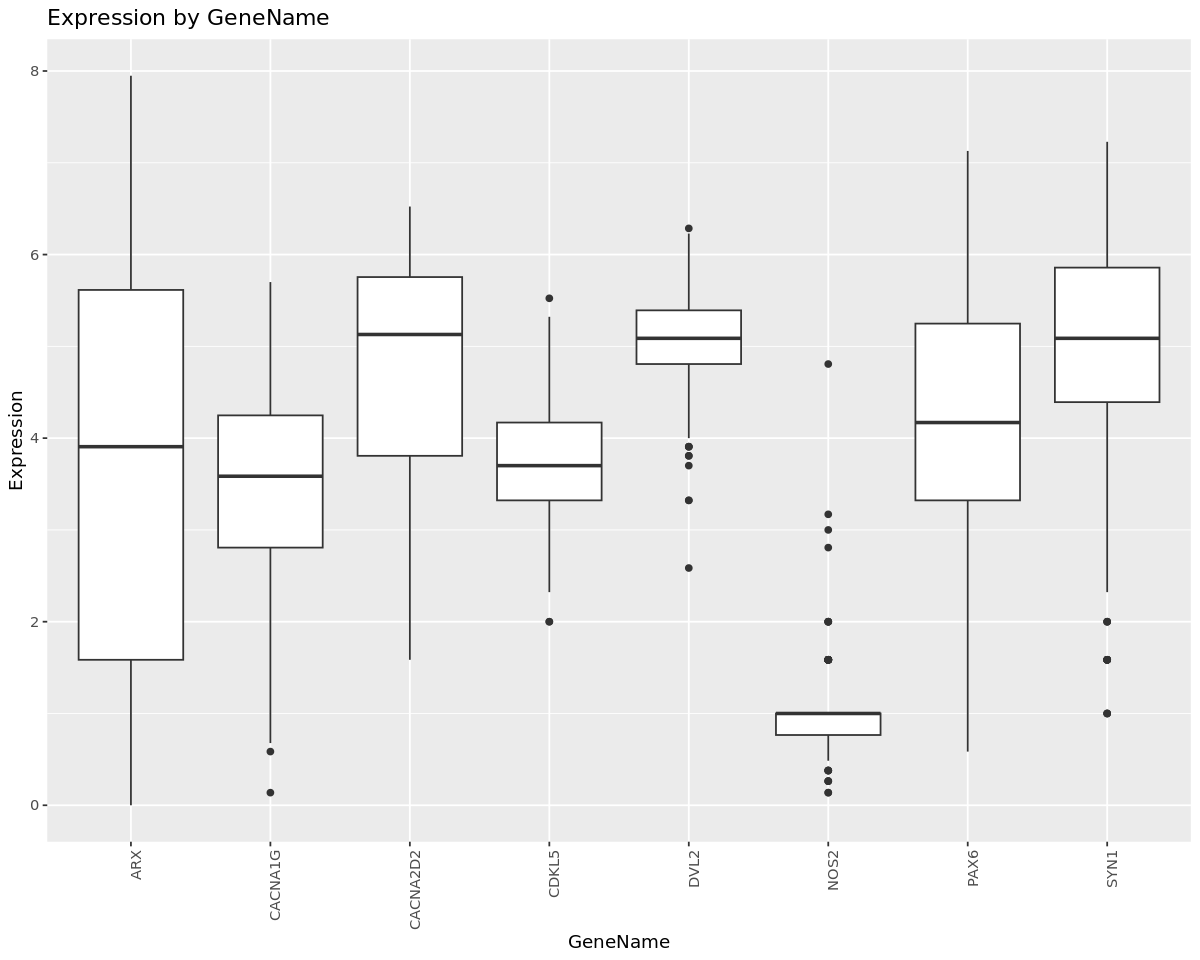

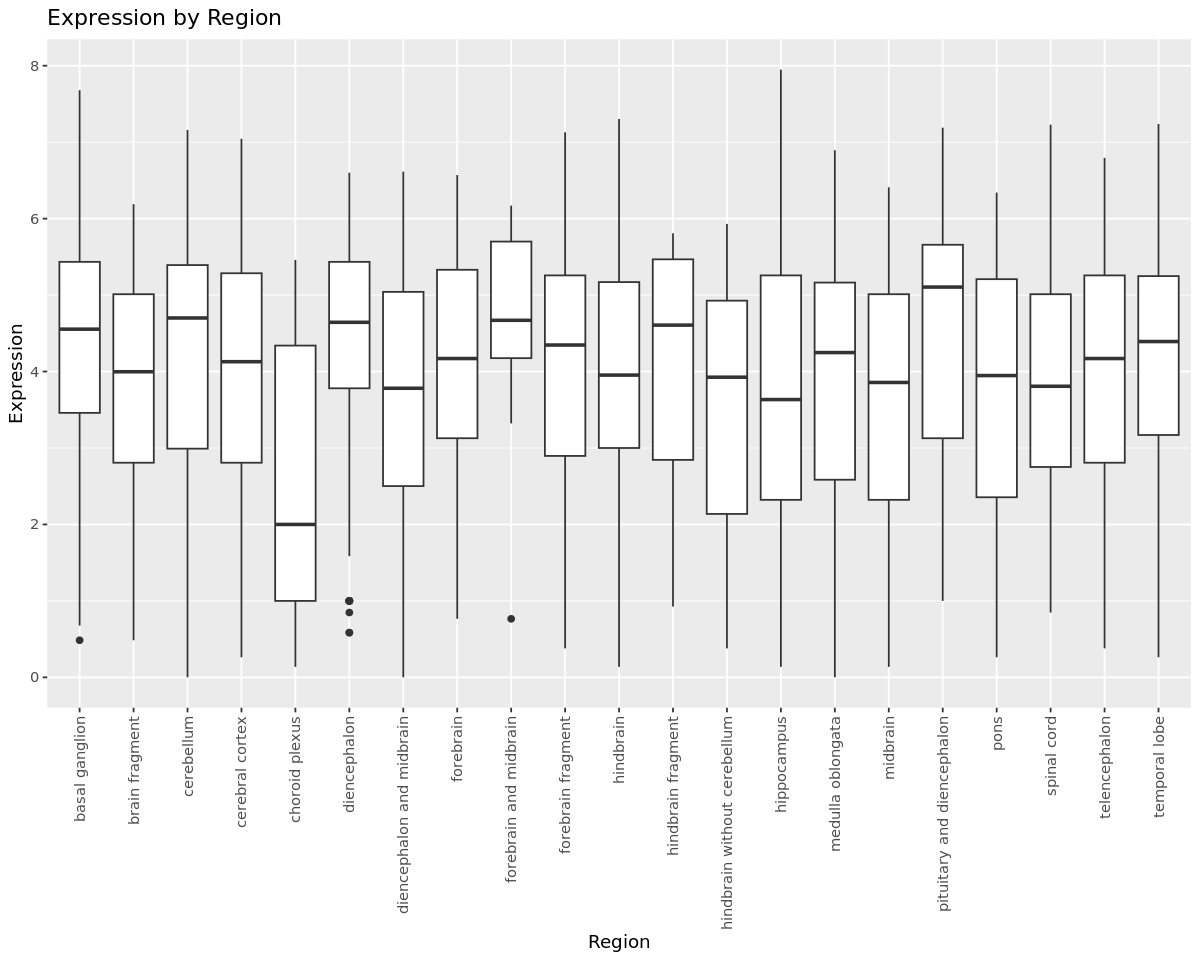

In [52]:
# Set the margin at the bottom to accommodate rotated labels
par(mar = c(7, 4, 4, 2) + 0.1)

# Create boxplots for Expression by GeneName and Region.
ggplot(df_subset, aes(x = GeneName, y = Expression)) + 
  geom_boxplot() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +  # Rotate x-axis labels for better readability
  labs(title = "Expression by GeneName",
       x = "GeneName",
       y = "Expression")

# Set plot size (width, height)
options(repr.plot.width=10, repr.plot.height=8)

# Create boxplots for Expression by Region with rotated labels.
ggplot(df_subset, aes(x = Region, y = Expression)) + 
  geom_boxplot() +
  theme(axis.text.x = element_text(angle = 90, vjust=0.5, hjust=1)) +  # Rotate x-axis labels for better readability
  labs(title = "Expression by Region",
       x = "Region",
       y = "Expression")


Let's make a version of the data with the outliers removed so that we can use them in the statistical modleing step together with the original data and then compare. Using Tukey's method:

In [62]:
# Compute the lower and upper bounds for each gene
bounds <- df_subset %>%
  group_by(GeneName) %>%
  summarise(lower = quantile(Expression, 0.25) - 1.5 * IQR(Expression),
            upper = quantile(Expression, 0.75) + 1.5 * IQR(Expression))

# Add these bounds to the original data
df_subset <- merge(df_subset, bounds, by = "GeneName")

# Identify the outliers
outliers <- df_subset[which(df_subset$Expression < df_subset$lower | df_subset$Expression > df_subset$upper),]

# Subset the data to exclude the outliers
df_subset_no_outliers <- df_subset[which(df_subset$Expression >= df_subset$lower & df_subset$Expression <= df_subset$upper),]
write.table(df_subset_no_outliers, "../data/data_subset_no_outliers.tsv", sep = "\t", row.names = FALSE)                             

In [63]:
dim(df_subset_no_outliers)
dim(df_subset)

[1] 1258   10

[1] 1320   10

In [57]:
outliers

GeneName,GeneID,Weeks,Region,Expression,Type,Numeric,NumericWeeks,Expression_sqrt,lower,upper
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>
CACNA1G,ENSG00000006283,11 post conception weeks,choroid plexus,0.5849625,p,11,p11,0.7648284,0.6464960,6.408786
CACNA1G,ENSG00000006283,9 post conception weeks,choroid plexus,0.1375035,p,9,p9,0.3708147,0.6464960,6.408786
CDKL5,ENSG00000008086,13 post conception weeks,temporal lobe,5.5235620,p,13,p13,2.3502259,2.0499327,5.441920
CDKL5,ENSG00000008086,14 post conception weeks,choroid plexus,2.0000000,p,14,p14,1.4142136,2.0499327,5.441920
CDKL5,ENSG00000008086,9 post conception weeks,choroid plexus,2.0000000,p,9,p9,1.4142136,2.0499327,5.441920
DVL2,ENSG00000004975,16 post conception weeks,medulla oblongata,3.8073549,p,16,p16,1.9512445,3.9299112,6.269761
DVL2,ENSG00000004975,16 post conception weeks,midbrain,3.8073549,p,16,p16,1.9512445,3.9299112,6.269761
DVL2,ENSG00000004975,9 post conception weeks,basal ganglion,3.9068906,p,9,p9,1.9765856,3.9299112,6.269761
DVL2,ENSG00000004975,9 post conception weeks,brain fragment,3.9068906,p,9,p9,1.9765856,3.9299112,6.269761
